In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest

In [2]:
df = pd.read_csv("../artifacts/raw/colorectal_cancer_dataset.csv")

In [3]:
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [4]:
df.shape

(167497, 28)

In [ ]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [ ]:
categorical_cols_df= df.select_dtypes(include=['object', 'category'])

In [26]:
categorical_cols_df_list = categorical_cols_df.columns.tolist()

In [27]:
categorical_cols_df_list

['Country',
 'Gender',
 'Cancer_Stage',
 'Family_History',
 'Smoking_History',
 'Alcohol_Consumption',
 'Obesity_BMI',
 'Diet_Risk',
 'Physical_Activity',
 'Diabetes',
 'Inflammatory_Bowel_Disease',
 'Genetic_Mutation',
 'Screening_History',
 'Early_Detection',
 'Treatment_Type',
 'Survival_5_years',
 'Mortality',
 'Urban_or_Rural',
 'Economic_Classification',
 'Healthcare_Access',
 'Insurance_Status',
 'Survival_Prediction']

In [30]:
for col in categorical_cols_df_list:
    print(f"\n--- Value Counts for Column: '{col}' ---")
    # Store the result in a variable and print it
    counts = df[col].value_counts()
    print(counts)


--- Value Counts for Column: 'Country' ---
Country
USA             25927
China           17525
South Korea     14107
Japan           13924
UK              12276
Germany         12258
India           10479
France          10426
Brazil          10399
Canada           8819
Italy            8795
Australia        6877
South Africa     5172
Nigeria          3551
Pakistan         3549
New Zealand      3413
Name: count, dtype: int64

--- Value Counts for Column: 'Gender' ---
Gender
M    100686
F     66811
Name: count, dtype: int64

--- Value Counts for Column: 'Cancer_Stage' ---
Cancer_Stage
Regional      66981
Localized     66799
Metastatic    33717
Name: count, dtype: int64

--- Value Counts for Column: 'Family_History' ---
Family_History
No     117184
Yes     50313
Name: count, dtype: int64

--- Value Counts for Column: 'Smoking_History' ---
Smoking_History
No     100141
Yes     67356
Name: count, dtype: int64

--- Value Counts for Column: 'Alcohol_Consumption' ---
Alcohol_Consumption
Yes 

In [31]:
numerical_cols_df= df.select_dtypes(include=['int64', 'float64'])

In [32]:
numerical_cols_df_list = numerical_cols_df.columns.tolist()

In [33]:
numerical_cols_df_list

['Patient_ID',
 'Age',
 'Tumor_Size_mm',
 'Healthcare_Costs',
 'Incidence_Rate_per_100K',
 'Mortality_Rate_per_100K']

In [34]:
df.isna().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.describe()

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [40]:
df.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

# VISUALIZATION

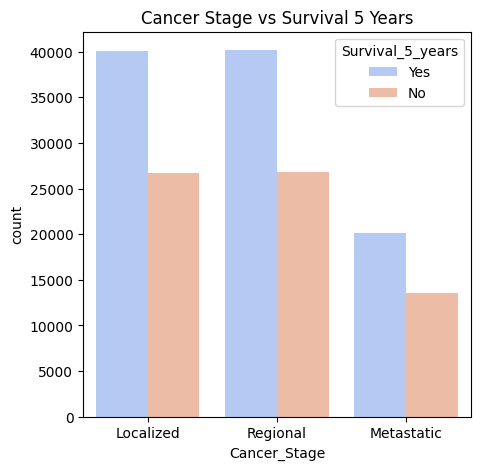

In [43]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Cancer_Stage", hue = "Survival_5_years", data = df, palette = "coolwarm")
plt.title("Cancer Stage vs Survival 5 Years")
plt.show()

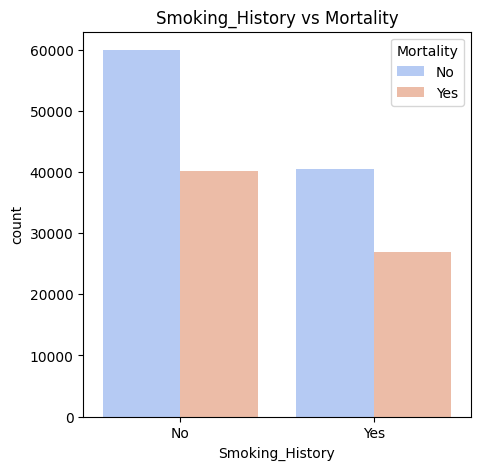

In [45]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Smoking_History", hue = "Mortality", data = df, palette = "coolwarm")
plt.title("Smoking_History vs Mortality")
plt.show()

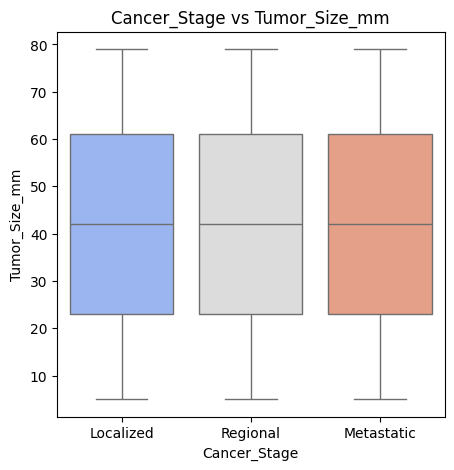

In [48]:
plt.figure(figsize = (5,5))
sns.boxplot(x = "Cancer_Stage", y = "Tumor_Size_mm", hue = "Cancer_Stage", legend = False, data = df, palette = "coolwarm")
plt.title("Cancer_Stage vs Tumor_Size_mm")
plt.show()

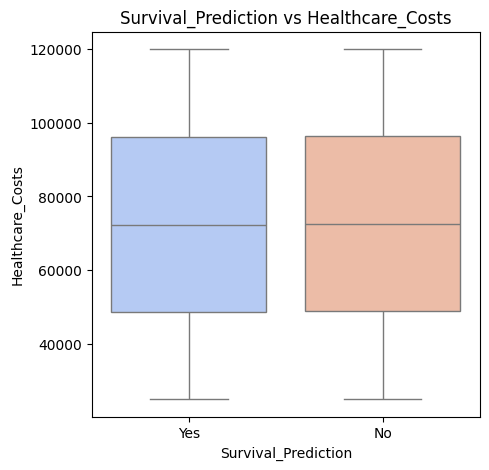

In [50]:
plt.figure(figsize = (5,5))
sns.boxplot(x = "Survival_Prediction", y = "Healthcare_Costs", hue = "Survival_Prediction", legend = False, data = df, palette = "coolwarm")
plt.title("Survival_Prediction vs Healthcare_Costs")
plt.show()

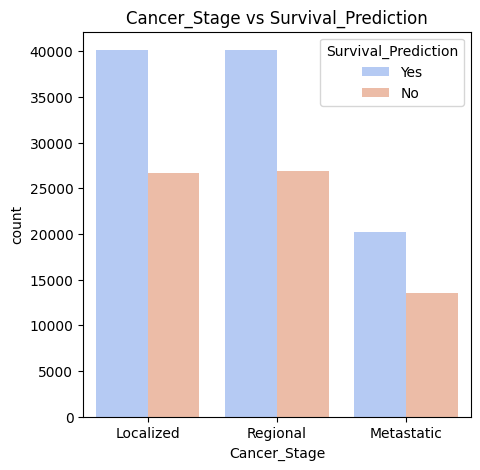

In [51]:
plt.figure(figsize = (5,5))
sns.countplot(x = "Cancer_Stage", hue = "Survival_Prediction", data = df, palette = "coolwarm")
plt.title("Cancer_Stage vs Survival_Prediction")
plt.show()

# Data Processing

In [ ]:
df = df.drop(columns = ["Patient_ID"])

In [53]:
df.shape

(167497, 27)

In [54]:
X = df.drop(columns = ['Survival_Prediction'])
y = df["Survival_Prediction"]

In [55]:
X.shape

(167497, 26)

In [56]:
y.shape

(167497,)

In [57]:
categorical_cols= X.select_dtypes(include=['object']).columns 

In [59]:
len(categorical_cols)

21

In [62]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [64]:
X.head()

,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status
0,14,77,1,0,69,0,0,1,2,1,...,1,1,0,54413,50,5,1,0,2,0
1,14,59,1,0,33,0,0,0,2,2,...,0,1,0,76553,37,25,1,1,0,1
2,8,66,1,2,17,0,1,0,0,1,...,0,1,0,62805,54,27,1,0,2,1
3,15,83,1,2,14,0,0,0,1,0,...,3,1,0,89393,45,11,1,0,2,0
4,4,66,1,0,34,0,1,0,0,1,...,3,1,0,66425,15,27,1,1,0,0


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42)

In [67]:
X_train

,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,Diet_Risk,...,Treatment_Type,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status
24800,3,87,1,1,54,1,0,0,2,2,...,3,1,1,105614,59,12,0,1,1,0
66479,8,71,1,2,73,0,1,1,1,2,...,3,1,1,115822,33,10,1,1,2,0
143021,3,63,0,2,37,0,0,0,2,0,...,0,1,0,50819,50,10,0,0,2,0
17512,2,51,1,0,31,0,1,0,2,2,...,0,1,0,25902,47,8,0,0,1,1
86417,4,67,1,1,15,0,1,0,0,1,...,3,1,0,118806,20,5,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,7,75,1,0,14,0,0,1,0,0,...,3,0,1,44031,42,13,0,0,1,0
103694,2,70,0,2,26,1,1,0,0,1,...,2,1,0,104569,11,16,0,0,2,1
131932,0,59,0,2,22,0,0,0,1,2,...,1,1,0,28140,12,12,1,0,2,1
146867,3,85,1,1,26,0,1,1,1,2,...,3,1,0,113454,23,22,1,0,2,0


In [68]:
y_train

24800      No
66479     Yes
143021    Yes
17512      No
86417      No
         ... 
119879    Yes
103694    Yes
131932    Yes
146867     No
121958    Yes
Name: Survival_Prediction, Length: 133997, dtype: object

# Chi-Square Test

In [70]:
X_cat = X_train.select_dtypes(include = ['int64', 'float64'])
chi2_selector = SelectKBest(score_func = chi2, k = 'all')
chi2_selector.fit(X_cat, y_train)

,score_func,<function chi...0021EF3ECD800>
,k,'all'


In [71]:
chi2_scores = pd.DataFrame({
    'Feature' : X_cat.columns,
    'Chi2 Score' : chi2_selector.scores_
}).sort_values(by = "Chi2 Score", ascending = False)

In [72]:
chi2_scores

,Feature,Chi2 Score
19,Healthcare_Costs,2097.430133
4,Tumor_Size_mm,7.971461
16,Treatment_Type,4.987144
11,Diabetes,2.103967
21,Mortality_Rate_per_100K,1.963077
25,Insurance_Status,1.464241
3,Cancer_Stage,1.281849
14,Screening_History,1.159519
0,Country,0.883425
24,Healthcare_Access,0.713346


In [73]:
top_features = chi2_scores.head(5)["Feature"].tolist()

In [74]:
top_features

['Healthcare_Costs',
 'Tumor_Size_mm',
 'Treatment_Type',
 'Diabetes',
 'Mortality_Rate_per_100K']

In [75]:
X = X[top_features]

In [76]:
X.shape

(167497, 5)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 42, stratify = y)

In [78]:
X_train.shape

(133997, 5)

# Model Building

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
gb = GradientBoostingClassifier(n_estimators = 100, learning_rate= 0.1, max_depth = 3, random_state = 42)

In [83]:
gb.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [84]:
y_pred = gb.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
accuracy = accuracy_score(y_test, y_pred)

In [87]:
accuracy

0.5995223880597015